d-sandbox

<div style="text-align: center; line-height: 0; padding-top: 9px;">
  <img src="https://databricks.com/wp-content/uploads/2018/03/db-academy-rgb-1200px.png" alt="Databricks Learning" style="width: 600px">
</div>

# Principal Components Analysis Lab

**Objective**: *Apply PCA to a dataset to learn more about how the features are related to one another.*

In this lab, you will apply what you've learned in this lesson. When complete, please use the answers to the exercises to answer questions in the following quiz within Coursera.

In [0]:
%run "../../Includes/Classroom-Setup"

Mounting course-specific datasets to /mnt/training ... Datasets are already mounted to /mnt/training from s3a://databricks-corp-training/common

Out[4]: DataFrame[]

res1: Boolean = false

res2: Boolean = false

res3: Boolean = false

## Exercise 1

In this exercise, you will create a user-level table with the following additional columns:

1. `steps_change` – the difference between the maximum steps and the minimum steps
1. `workout_minutes_change` - the difference between the maximum workout minutes and the minimum workout minutes
1. `var_workout_minutes` – the variance of the workout minutes
1. `var_steps` - the population variance of the steps

Fill in the blanks in the below cell to create the `adsda.ht_user_metrics_pca_lab` table.

In [0]:
%sql
-- TODO
CREATE OR REPLACE TABLE adsda.ht_user_metrics_pca_lab
USING DELTA LOCATION "/adsda/ht-user-metrics-pca-lab" AS (
  SELECT min(resting_heartrate) AS min_resting_heartrate,
         avg(resting_heartrate) AS avg_resting_heartrate,
         max(resting_heartrate) AS max_resting_heartrate,
         min(active_heartrate) AS min_active_heartrate,
         avg(active_heartrate) AS avg_active_heartrate,
         max(active_heartrate) AS max_active_heartrate,
         min(bmi) AS min_bmi,
         avg(bmi) AS avg_bmi,
         max(bmi) AS max_bmi,
         min(vo2) AS min_vo2,
         avg(vo2) AS avg_vo2,
         max(vo2) AS max_vo2,
         min(workout_minutes) AS min_workout_minutes,
         avg(workout_minutes) AS avg_workout_minutes,
         max(workout_minutes) AS max_workout_minutes,
         min(steps) AS min_steps,
         avg(steps) AS avg_steps,
         max(steps) AS max_steps,
         avg(steps) * avg(active_heartrate) AS as_x_aah,
         max(bmi) - min(bmi) AS bmi_change,
         max(steps) - min(steps) AS steps_change,
         max(workout_minutes) - min(workout_minutes) AS workout_minutes_change,
         variance(workout_minutes) AS var_workout_minutes,
         variance(steps) AS var_steps
  FROM adsda.ht_daily_metrics
  GROUP BY device_id
)

num_affected_rows,num_inserted_rows


-sandbox
**Coursera Quiz:** How many rows and columns are in `adsda.ht_user_metrics_pca_lab`?

Fill in the blanks to get the answer to the question.

<img alt="Hint" title="Hint" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.3em" src="https://files.training.databricks.com/static/images/icon-light-bulb.svg"/>&nbsp;**Hint:** Refer back to the previous lesson's lab for help.

In [0]:
# TODO
df = spark.table("adsda.ht_user_metrics_pca_lab").toPandas()
df.shape

Out[9]: (3000, 24)

## Exercise 2

In this exercise, you will perform PCA.

Fill in the blanks below to perform the PCA analysis.

In [0]:
# TODO
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA(random_state=42)
pca.fit(scale(df))

Out[10]: PCA(random_state=42)

-sandbox
**Coursera Quiz:** How many components were computed?

<img alt="Hint" title="Hint" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.3em" src="https://files.training.databricks.com/static/images/icon-light-bulb.svg"/>&nbsp;**Hint:** Refer back to the Applied PCA demo.

In [0]:
# TODO
pca.n_components_

Out[13]: 24

## Exercise 3

In this this exercise, you will visualize and identify the variance explained by the first component.

Fill in the blanks below to complete these tasks.

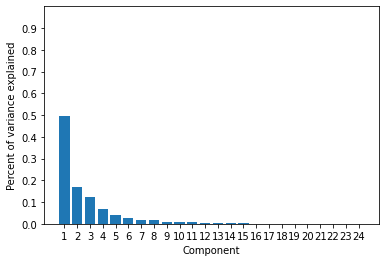

In [0]:
# TODO
import matplotlib.pyplot as plt
import numpy as np

plt.bar(range(1, 25), pca.explained_variance_ratio_) 
plt.xlabel('Component') 
plt.xticks(range(1, 25))
plt.ylabel('Percent of variance explained')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

**Coursera Quiz:** How much of the total variation in the feature set is explained by the first component?

In [0]:
# TODO
print(pca.explained_variance_ratio_[0])

0.49769440976398815


## Exercise 4

In this exercise, you will determine how many components it takes to account for 90 percent of the variation in the feature set.

Fill in the blanks below to visualize the cumulative sum of variance explained.

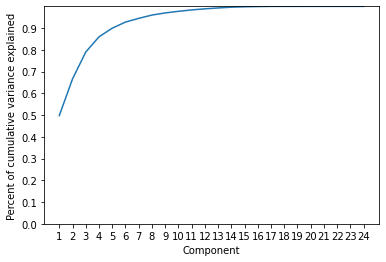

In [0]:
# TODO
plt.plot(range(1, 25), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component') 
plt.xticks(range(1, 25))
plt.ylabel('Percent of cumulative variance explained')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

The above graphs are helpful but can be hard to visualize. Let's determine this programmatically.

**Coursera Quiz**: How many components does it take to explain 90 percent of the variation in the original feature set?

In [0]:
for component in list(zip(range(1, 25), np.cumsum(pca.explained_variance_ratio_))):
  if component[1] >= 0.9:
    print(component)
    break

(6, 0.9277388109991984)


-sandbox
## Exercise 5

In this exercise, you will examine the factor loadings of the PCA model.

Fill in the blanks below to return the factor loadings.

<img alt="Hint" title="Hint" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.3em" src="https://files.training.databricks.com/static/images/icon-light-bulb.svg"/>&nbsp;**Hint:** Check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to determine which attribute returns the components.

In [0]:
# TODO
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

Out[23]: array([[ 7.79463205e-01,  4.34144447e-01, -3.60014520e-02,
         1.37320095e-01, -9.73723184e-02, -1.42524352e-01,
        -1.47521959e-01,  3.09895335e-02,  2.69949081e-01,
         1.86328749e-01, -8.53199419e-02,  1.62696700e-02,
         7.86457734e-03,  1.18789723e-01,  3.37422154e-02,
         3.20642166e-02, -1.19998695e-02,  1.27749959e-05,
         4.28884464e-05, -1.34671002e-05,  8.35401009e-06,
         2.66602326e-32,  3.21291331e-32,  9.45630323e-32],
       [ 8.91239458e-01,  3.55982125e-01, -1.09563329e-01,
         1.00622791e-01, -1.09465198e-01, -1.18873831e-01,
        -3.57743687e-02,  1.42705425e-02,  7.64962655e-02,
         4.17117577e-02, -1.86308124e-02, -3.63813247e-03,
        -1.12507439e-02, -5.67462609e-02, -3.88474961e-02,
        -1.11401007e-01,  6.60156737e-02,  2.83388425e-04,
         4.31082087e-04,  2.81866107e-05, -1.82344868e-05,
         1.38199941e-31,  1.58412607e-32, -1.41284987e-31],
       [ 8.94353302e-01,  2.63988963e-01, -1.

**Coursera Quiz**: How many rows and columns are there in this loadings matrix?

In [0]:
loadings.shape

Out[24]: (24, 24)

-sandbox
## Exercise 6

In this exercise, you will use the loadings from the previous exercise to determine which is the most correlated with the first component.

Fill in the blanks below to create a more useful loadings DataFrame using the `loadings` matrix defined in the previous exercise.

<img alt="Side Note" title="Side Note" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.05em; transform:rotate(15deg)" src="https://files.training.databricks.com/static/images/icon-note.webp"/> This is the same data, but it now has helpful column and row names to make more sense of what we're looking at.

In [0]:
# TODO
import pandas as pd

component_columns = ["PC" + str(x) for x in range(1, 25)]
loadings_df = pd.DataFrame(loadings, columns=component_columns, index=df.columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
min_resting_heartrate,0.779463,0.434144,-0.036001,0.137320,-0.097372,-0.142524,-0.147522,0.030990,0.269949,0.186329,...,0.033742,0.032064,-0.012000,0.000013,4.288845e-05,-1.346710e-05,8.354010e-06,2.666023e-32,3.212913e-32,9.456303e-32
avg_resting_heartrate,0.891239,0.355982,-0.109563,0.100623,-0.109465,-0.118874,-0.035774,0.014271,0.076496,0.041712,...,-0.038847,-0.111401,0.066016,0.000283,4.310821e-04,2.818661e-05,-1.823449e-05,1.381999e-31,1.584126e-32,-1.412850e-31
max_resting_heartrate,0.894353,0.263989,-0.162070,0.069986,-0.133568,-0.115991,-0.011475,0.017086,0.057940,0.014628,...,0.015124,0.055666,-0.017552,-0.000053,1.954397e-05,-5.361952e-06,2.518540e-06,-4.295411e-32,-1.201274e-31,5.332824e-32
min_active_heartrate,0.816978,0.171474,0.005317,-0.054289,-0.073283,0.481038,-0.063095,0.008518,0.047855,0.021294,...,-0.044203,0.014355,0.002405,0.000077,-3.690867e-03,4.027332e-07,-7.131563e-06,-1.578371e-32,3.453882e-32,-1.733763e-32
avg_active_heartrate,0.874012,0.144814,-0.174717,-0.087969,-0.110630,0.347192,0.032539,0.020127,-0.036890,-0.028298,...,0.087579,-0.025435,-0.017030,-0.000356,1.340865e-02,6.905039e-05,2.775359e-05,-2.122308e-34,-3.727889e-32,-2.101828e-32
max_active_heartrate,0.855555,0.097306,-0.170459,-0.068268,-0.070387,0.365423,-0.034928,0.004849,0.003201,-0.038435,...,-0.021305,0.000751,-0.000962,-0.000077,-2.875074e-04,3.792881e-05,1.449876e-06,7.540632e-32,1.520820e-32,3.000085e-32
min_bmi,0.427543,-0.795271,-0.378072,-0.063911,-0.074897,-0.036909,0.050607,0.015054,-0.010889,-0.031258,...,0.006714,0.002886,0.011401,-0.020176,-3.697211e-06,9.890378e-05,-2.508366e-07,-5.882180e-19,6.749379e-17,9.896404e-17
avg_bmi,0.429475,-0.801595,-0.383367,-0.065339,-0.074797,-0.036091,0.051142,0.013352,-0.003883,-0.006168,...,0.007934,0.002860,0.008668,0.037530,4.752325e-04,-1.752340e-04,-3.732135e-06,-2.335459e-31,4.138118e-32,-2.088712e-31
max_bmi,0.430350,-0.805000,-0.385545,-0.065733,-0.074879,-0.037229,0.050931,0.011487,0.000292,0.016742,...,0.006408,0.002646,0.009059,-0.016198,8.044222e-07,7.834348e-05,-3.825505e-07,7.457978e-19,-8.557494e-17,-1.254759e-16
min_vo2,-0.847532,-0.398065,0.162465,-0.060043,0.183276,0.164036,-0.117808,-0.017287,0.109849,0.044037,...,0.005573,-0.009768,0.007274,-0.000369,3.637157e-04,-1.280456e-02,3.689827e-03,-5.592763e-32,8.875936e-31,-3.576016e-31


-sandbox
**Coursera Quiz**: Which of the features is most correlated (in any direction) with the first component `PC1`?

<img alt="Side Note" title="Side Note" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.05em; transform:rotate(15deg)" src="https://files.training.databricks.com/static/images/icon-note.webp"/> The below code uses the Pandas DataFrame API. You can always turn this back into a SQL table if you're more comfortable with SQL.

In [0]:
abs(loadings_df["PC1"]).sort_values(ascending=False)

Out[26]: avg_steps                 0.929000
max_resting_heartrate     0.894353
avg_resting_heartrate     0.891239
var_steps                 0.881574
avg_active_heartrate      0.874012
max_active_heartrate      0.855555
avg_vo2                   0.847682
max_vo2                   0.847614
min_vo2                   0.847532
min_active_heartrate      0.816978
as_x_aah                  0.803508
min_resting_heartrate     0.779463
min_steps                 0.663959
max_steps                 0.662415
avg_workout_minutes       0.622555
steps_change              0.618185
var_workout_minutes       0.601186
min_workout_minutes       0.430523
max_bmi                   0.430350
avg_bmi                   0.429475
min_bmi                   0.427543
bmi_change                0.396701
workout_minutes_change    0.380294
max_workout_minutes       0.303061
Name: PC1, dtype: float64

-sandbox
### Exercise 7

In this exercise, you will prepare a feature set using the first few components from our PCA process.

Fill in the blanks below to prepare the new feature set using only the first three components.

<img alt="Hint" title="Hint" style="vertical-align: text-bottom; position: relative; height:1.75em; top:0.3em" src="https://files.training.databricks.com/static/images/icon-light-bulb.svg"/>&nbsp;**Hint:** Check out the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to determine which method applies dimensionality reduction to an existing feature set.

In [0]:
# TODO
component_df = pd.DataFrame(pca.transform(scale(df)), columns=component_columns)
component_3_df = component_df.loc[:, ["PC1", "PC2", "PC3"]]
component_3_df

,PC1,PC2,PC3
0,6.848836,0.935734,3.059826
1,2.853990,0.515427,-1.670232
2,4.012947,4.173795,-2.057040
3,3.291015,1.179936,-1.865608
4,3.173020,-1.775181,-2.453792
...,...,...,...
2995,3.524593,2.660029,-1.700657
2996,4.491508,2.969448,-1.949951
2997,7.089698,1.097704,3.261522
2998,5.563654,-1.600748,2.705918


**Coursera Quiz**: Which of the following is a drawback of using PCA to reduce the feature space for supervised learning problems?

* PCA only needs a few components to represent the original features
* The curse of dimensionality
* PCA only works with a few columns at a time
* The resulting features are less interpretable

Congrats! That concludes our lesson on PCA!

Be sure to submit your quiz answers to Coursera, and join us in the next module to learn about feature engineering and selection.

-sandbox
&copy; 2021 Databricks, Inc. All rights reserved.<br/>
Apache, Apache Spark, Spark and the Spark logo are trademarks of the <a href="http://www.apache.org/">Apache Software Foundation</a>.<br/>
<br/>
<a href="https://databricks.com/privacy-policy">Privacy Policy</a> | <a href="https://databricks.com/terms-of-use">Terms of Use</a> | <a href="http://help.databricks.com/">Support</a>